In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
import json
acc_score = od()

In [2]:
def get_entropy_from_culling_factor(c):
    S = od()
    for E in range(-len(c), 1):
        if E in c:
            S[E] = np.log(c[E])
        for E1 in c:
            if (E1 > E):
                S[E] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_with_heat(c):
    S = od()
    for E in range(-len(c) + 1, 1):
        if E in c:
            S[E + 2] = np.log(c[E])
        for E1 in c:
            if (E1 < E):
                S[E + 2] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_v2(c):
    S = od()
    for E in c:
        S[E] = np.log(c[E])
        for E1 in c:
            if (E1 > E):
                S[E] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_with_heat_v2(c):
    S = od()
    for E in c:
        if E in c:
            S[E] = np.log(c[E])
        for E1 in c:
            if (E1 < E):
                S[E] += np.log(1 - c[E1])
    return S

In [3]:
def read_files(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    print(name)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c

    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat(culling_factor)
    
    return parameters

def read_files_v2(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    D=parameters["D"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DBlume{}_q{}_D{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, "{0:07.6f}".format(D), N, R, nSteps, seed)
    print(name)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor_v2(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat_v2(culling_factor)
    
    return parameters

In [4]:
cool, heat = {
    "q": 3,
    "L": 32,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 0,
    "heat": False
}, {
    "q": 3,
    "L": 32,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 0,
    "heat": True
}

for parameters in [cool, heat]:
    parameters = read_files(parameters)

cool_v2, heat_v2 = {
    "q": 3,
    "D": 0.0,
    "L": 32,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 1,
    "heat": False
}, {
    "q": 3,
    "D": 0.0,
    "L": 32,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 1,
    "heat": True
}

for parameters in [cool_v2, heat_v2]:
    parameters = read_files_v2(parameters)

./datasets/2DPotts_q3_N1024_R131072_nSteps10_run0X.txt
1024 131072 10 False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


./datasets/2DPottsHeating_q3_N1024_R131072_nSteps10_run0X.txt
1024 131072 10 True


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


./datasets/2DBlume_q3_D0.000000_N1024_R131072_nSteps10_run1X.txt
1024 131072 10 False
./datasets/2DBlumeHeating_q3_D0.000000_N1024_R131072_nSteps10_run1X.txt
1024 131072 10 True


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


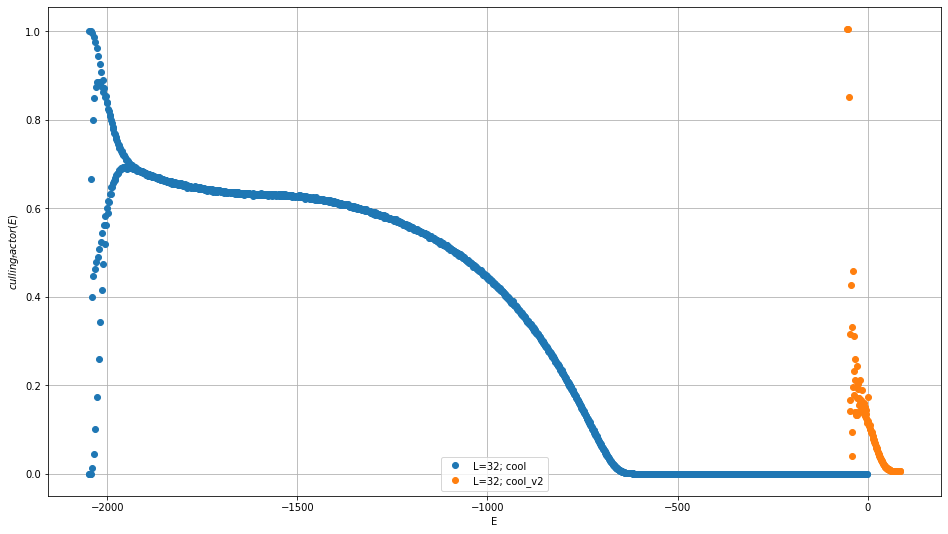

In [5]:
plt.figure(figsize=(16, 9))

#for L in lst:
    
plt.plot([E for E in cool["culling_factor"]], [S for E, S in cool["culling_factor"].items()]
         , 'o', label="L={}; cool".format(cool["L"]))
plt.plot([E for E in cool_v2["culling_factor"]], [S + 0.005 for E, S in cool_v2["culling_factor"].items()]
         , 'o', label="L={}; cool_v2".format(cool_v2["L"]))

plt.ylabel("$culling_factor(E)$")
plt.xlabel("E")
#plt.ylim([-200, -175])
#plt.xlim([-216, -175])
plt.legend()
plt.grid()

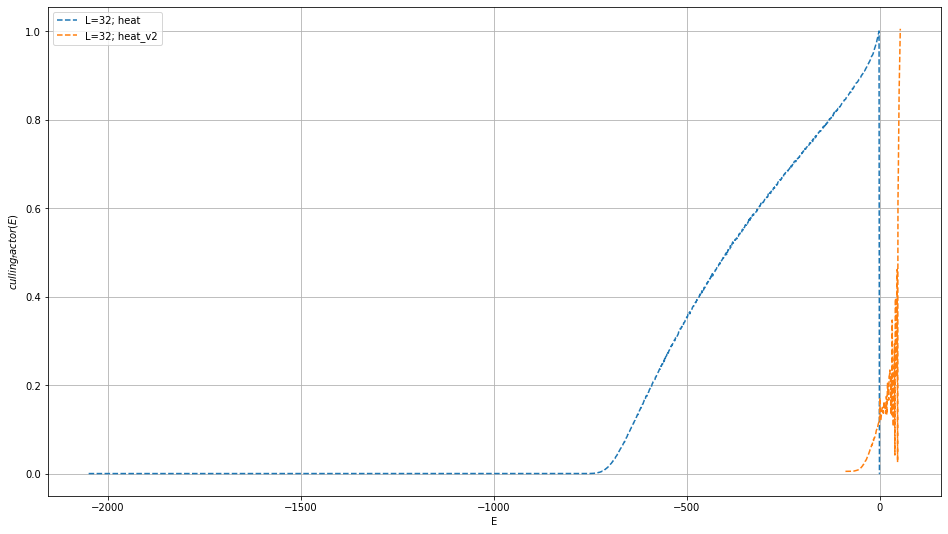

In [6]:
plt.figure(figsize=(16, 9))

#for L in lst:
    
plt.plot([E for E in heat["culling_factor"]], [S for E, S in heat["culling_factor"].items()]
         , '--', label="L={}; heat".format(heat["L"]))
plt.plot([E for E in heat_v2["culling_factor"]], [S + 0.005 for E, S in heat_v2["culling_factor"].items()]
         , '--', label="L={}; heat_v2".format(heat_v2["L"]))

plt.ylabel("$culling_factor(E)$")
plt.xlabel("E")
#plt.ylim([-200, -175])
#plt.xlim([-216, -175])
plt.legend()
plt.grid()

In [9]:
def stitch_S(heat, cool):
    #not infinite values
    niv = sorted( list({E for E, S in heat["S"].items() if not np.isinf(S)} & {E for E, S in cool["S"].items() if not np.isinf(S)}) )
    #chosen not infinite values
    cniv = niv[len(niv) // 3 : 2 * len(niv) // 3]
    shift = 0
    count = 0
    for E in cniv:
        shift += heat["S"][E] - cool["S"][E]
        count += 1
    shift /= count

    result = od()
    for E in range(- 2 * heat["L"] ** 2, 1):
        if E < max(cniv):
            result[E] = cool["S"][E]
        elif E >= max(cniv):
            result[E] = heat["S"][E] - shift    
    return {"S": result, "L": heat["L"]}

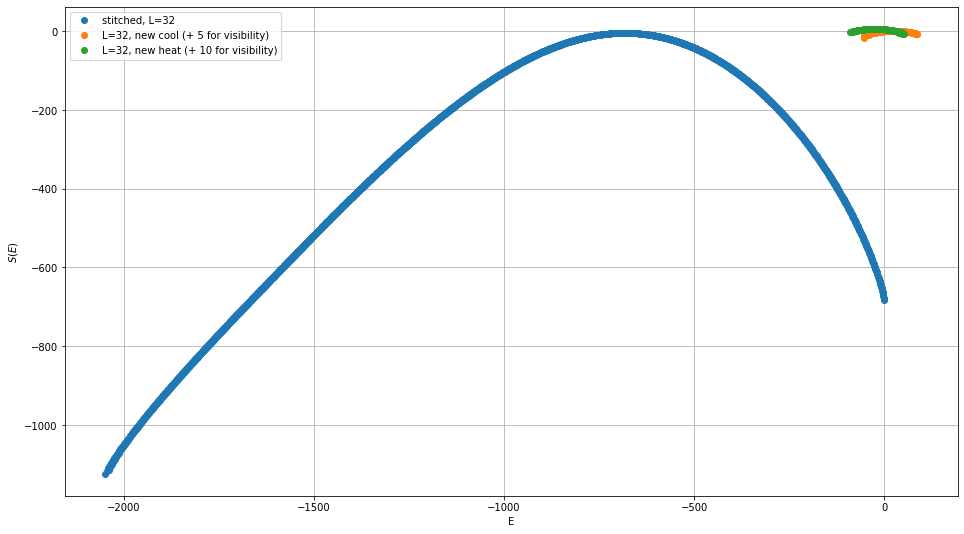

In [10]:
plt.figure(figsize=(16, 9))

st = stitch_S(heat, cool);

plt.plot([E for E in st["S"]],
         [S for E, S in st["S"].items()]
         , 'o', label="stitched, L={}".format(st["L"]))
plt.plot([E for E in cool_v2["S"]],
        [S + 5 for E, S in cool_v2["S"].items()],
        'o', label="L={}, new cool (+ 5 for visibility)".format(cool_v2["L"]))

plt.plot([E for E in heat_v2["S"]],
    [S + 10 for E, S in heat_v2["S"].items()],
    'o', label="L={}, new heat (+ 10 for visibility)".format(heat_v2["L"]))

#plt.ylabel("$g = e^{S(E)}$")
plt.ylabel("$S(E)$")
plt.xlabel("E")
#left
#plt.ylim([-1150, -1050])
#plt.xlim([-2060, -2000])
#middle
#plt.ylim([-100, 10])
#plt.xlim([-900, -500])
#right
#plt.ylim([-800, -200])
#plt.xlim([-100, 10])

plt.legend()
plt.grid()